In [ ]:
#pip install mlxtend --upgrade --no-deps

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import csv
from mlxtend.frequent_patterns import fpgrowth

In [10]:
acc_list_of_arrays=[]
with open('/content/kosarak.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        #temp= temp[:-1]
        #print(temp)
        acc_list_of_arrays.append(temp)

FileNotFoundError: ignored

In [ ]:
del acc_list_of_arrays[10000:]

In [6]:

times = list()
elements = list()
minsupport = .6
while minsupport <=1:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(acc_list_of_arrays).transform(acc_list_of_arrays)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= fpgrowth(df, min_support=minsupport, use_colnames=True)
  elements.append(minsupport)    
  end = time.process_time()
  times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.05

         support               itemsets
0       1.000000                     ()
1       0.999687                   (58)
2       0.996558                   (52)
3       0.995307                   (29)
4       0.991865                   (40)
...          ...                    ...
509884  0.600751     (, 58, 50, 40, 62)
509885  0.600751      (, 58, 50, 62, 7)
509886  0.600751      (, 50, 40, 62, 7)
509887  0.600751    (58, 50, 40, 62, 7)
509888  0.600751  (, 58, 50, 40, 62, 7)

[509889 rows x 2 columns]
Runtime of the program is 9.998457763000001
         support        itemsets
0       1.000000              ()
1       0.999687            (58)
2       0.996558            (52)
3       0.995307            (29)
4       0.991865            (40)
...          ...             ...
222474  0.653630      (, 60, 11)
222475  0.653317    (58, 60, 11)
222476  0.650188    (52, 60, 11)
222477  0.653317  (, 60, 11, 58)
222478  0.650188  (52, 60, 11, )

[222479 rows x 2 columns]
Runtime of the program is 

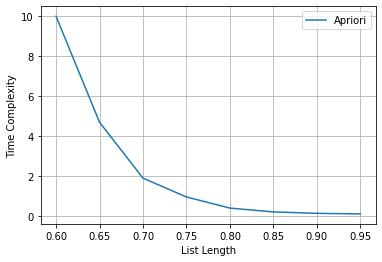

In [7]:
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements, times, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('check.jpg')
plt.show()
